## Data Loading and Inspection

#### Load the necessary libraries

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Read data and display the first 5 rows of all columns

In [259]:
ecommerce = pd.read_csv(r"C:\Users\ahmet\project 3\pakistan-ecommerce-dataset.csv", low_memory = False)

pd.set_option("display.max_columns", None)

ecommerce.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


#### Check column data types

In [260]:
ecommerce.dtypes

item_id                  float64
status                    object
created_at                object
sku                       object
price                    float64
qty_ordered              float64
grand_total              float64
increment_id              object
category_name_1           object
sales_commission_code     object
discount_amount          float64
payment_method            object
Working Date              object
BI Status                 object
 MV                       object
Year                     float64
Month                    float64
Customer Since            object
M-Y                       object
FY                        object
Customer ID              float64
Unnamed: 21              float64
Unnamed: 22              float64
Unnamed: 23              float64
Unnamed: 24              float64
Unnamed: 25              float64
dtype: object

#### Number of rows and columns

In [261]:
print(f"Number of rows: {ecommerce.shape[0]}")
print(f"Number of columns: {ecommerce.shape[1]}")

Number of rows: 1048575
Number of columns: 26


In [262]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

#### Number of null values on each column

In [263]:
ecommerce.isnull().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601229
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

#### Percentage of null values

In [264]:
null_percentage = ((ecommerce.isnull().sum() / len(ecommerce)) * 100).map("{:.0f}%".format)

null_percentage

item_id                   44%
status                    44%
created_at                44%
sku                       44%
price                     44%
qty_ordered               44%
grand_total               44%
increment_id              44%
category_name_1           44%
sales_commission_code     57%
discount_amount           44%
payment_method            44%
Working Date              44%
BI Status                 44%
 MV                       44%
Year                      44%
Month                     44%
Customer Since            44%
M-Y                       44%
FY                        44%
Customer ID               44%
Unnamed: 21              100%
Unnamed: 22              100%
Unnamed: 23              100%
Unnamed: 24              100%
Unnamed: 25              100%
dtype: object

As we can see, more than 40% of the values in the majority of the columns are null, on top of 5 entirely null columns.

#### See the number of duplicate rows

In [265]:
ecommerce.duplicated().sum()

464050

Since the number of duplicate rows is very close to the number of null values in most columns, we can infer that nearly all of the duplicate rows are empty rows.

#### Check the unique values in categorical columns

In [266]:
categorical_columns = ['status', 'payment_method', 'category_name_1', 'BI Status']
dataframes = []

for column in categorical_columns:
    dataframes.append(pd.DataFrame({column: ecommerce[column].unique()}))

merged_df = pd.concat(dataframes, axis=1).fillna('')
merged_df

,status,payment_method,category_name_1,BI Status
0,complete,cod,Women's Fashion,#REF!
1,canceled,ublcreditcard,Beauty & Grooming,Gross
2,order_refunded,mygateway,Soghaat,Net
3,received,customercredit,Mobiles & Tablets,Valid
4,refund,cashatdoorstep,Appliances,
5,closed,mcblite,Home & Living,
6,fraud,internetbanking,Men's Fashion,
7,holded,marketingexpense,Kids & Baby,
8,exchange,productcredit,\N,
9,pending_paypal,financesettlement,Others,


## Data Cleaning

We will start by dealing with the null values.

#### Drop null columns

In [267]:
columns_to_drop = ecommerce.columns[ecommerce.isnull().all()]

ecommerce.drop(columns=columns_to_drop, inplace=True)

#### Show the percentage of null values of the remaining columns

In [268]:
null_percentage = ((ecommerce.isnull().sum() / len(ecommerce)) * 100).map("{:.0f}%".format)

null_percentage

item_id                  44%
status                   44%
created_at               44%
sku                      44%
price                    44%
qty_ordered              44%
grand_total              44%
increment_id             44%
category_name_1          44%
sales_commission_code    57%
discount_amount          44%
payment_method           44%
Working Date             44%
BI Status                44%
 MV                      44%
Year                     44%
Month                    44%
Customer Since           44%
M-Y                      44%
FY                       44%
Customer ID              44%
dtype: object

In [269]:
ecommerce.dropna(how="all", inplace=True) # Drop rows where values are null

ecommerce.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137178
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

I will drop the sales_commission_code column since more than half of it is null values and it can't be filled since it has unique codes.

In [270]:
ecommerce.drop(columns="sales_commission_code", inplace=True)

#### Drop the rows where Customer ID or sku columns are null

Since they have unique codes, filling them makes no sense

In [271]:
ecommerce.dropna(subset=["sku", "Customer ID"], inplace=True)

ecommerce.isnull().sum()

item_id              0
status              15
created_at           0
sku                  0
price                0
qty_ordered          0
grand_total          0
increment_id         0
category_name_1    164
discount_amount      0
payment_method       0
Working Date         0
BI Status            0
 MV                  0
Year                 0
Month                0
Customer Since       0
M-Y                  0
FY                   0
Customer ID          0
dtype: int64

Dropping the rows where the Customer ID was null also got rid of null values in the Customer Since column, so we only have 2 columns left.

#### Fill the remaining null values with the modes of the columns

In [272]:
ecommerce["status"] = ecommerce["status"].fillna(ecommerce["status"].mode()[0])
ecommerce["category_name_1"] = ecommerce["category_name_1"].fillna(ecommerce["category_name_1"].mode()[0])

ecommerce.isnull().sum()

item_id            0
status             0
created_at         0
sku                0
price              0
qty_ordered        0
grand_total        0
increment_id       0
category_name_1    0
discount_amount    0
payment_method     0
Working Date       0
BI Status          0
 MV                0
Year               0
Month              0
Customer Since     0
M-Y                0
FY                 0
Customer ID        0
dtype: int64

#### Replace the "\N" values in the status and category_name_1 columns

In [273]:
# Since the "\N" values weren't acknowledged as null during data loading, we need to replace them manually
ecommerce["category_name_1"] = ecommerce["category_name_1"].replace(r"\N", np.random.choice(ecommerce[ecommerce["category_name_1"] != np.nan]["category_name_1"]))
ecommerce["status"] = ecommerce["status"].replace(r"\N", ecommerce["status"].mode()[0])

#### Rename columns for consistency

In [274]:
ecommerce.rename(columns={
    ' MV ': 'market_value',
    'Customer Since': 'customer_since',
    'M-Y': 'M_Y',
    'Working Date': 'working_date',
    "BI Status": "bi_status",
    "Year": "year",
    "Month": "month",
    "Customer ID": "customer_id",
    "category_name_1": "category_name"
}, inplace=True)

ecommerce.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name,discount_amount,payment_method,working_date,bi_status,market_value,year,month,customer_since,M_Y,FY,customer_id
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


The very first value on the "bi_status" column is #REF!, which indicates there was an error in the spreadsheet formula. In case this is repeated throughout the column, let's first set the #REF! values to NaN, and then impute them with the mode of the column.

In [275]:
ecommerce["bi_status"] = ecommerce["bi_status"].replace("#REF!", np.nan)
ecommerce["bi_status"] = ecommerce["bi_status"].fillna(ecommerce["bi_status"].mode()[0])

###

#### Convert date columns into datetime objects

In [276]:
ecommerce["created_at"] = pd.to_datetime(ecommerce["created_at"])
ecommerce["working_date"] = pd.to_datetime(ecommerce["working_date"])

try:
    ecommerce["customer_since"] = pd.to_datetime(ecommerce["customer_since"],  format="%Y-%m", errors="coerce")
except Exception as e:
    print(f"Error parsing customer_since: {e}")
    

#### Convert numeric columns into numeric types

In [277]:
cols_to_numeric = ["price", 'grand_total', 'market_value', 'discount_amount', "increment_id"]
for col in cols_to_numeric:
    if ecommerce[col].dtype == 'object': # Check if it's not already numeric
        ecommerce[col] = ecommerce[col].astype(str).str.replace(',', '', regex=False).str.strip()
        ecommerce[col] = pd.to_numeric(ecommerce[col], errors='coerce') # 'coerce' will turn errors into NaN
        ecommerce.dropna(subset=[col], inplace=True)

In [278]:
cols_to_int = ['item_id', 'increment_id', 'qty_ordered', 'year', "month", "customer_id"]
for col in cols_to_int:
    ecommerce[col] = ecommerce[col].astype(int)

#### Convert categorical columns into category type

In [279]:
categorical_columns = ['status', 'payment_method', 'category_name', 'bi_status']
ecommerce[categorical_columns] = ecommerce[categorical_columns].astype('category')

In [280]:
ecommerce.dtypes

item_id                     int32
status                   category
created_at         datetime64[ns]
sku                        object
price                     float64
qty_ordered                 int32
grand_total               float64
increment_id                int32
category_name            category
discount_amount           float64
payment_method           category
working_date       datetime64[ns]
bi_status                category
market_value              float64
year                        int32
month                       int32
customer_since     datetime64[ns]
M_Y                        object
FY                         object
customer_id                 int32
dtype: object

From the first couple of rows, the "created_at" and the "working_date" columns seem to have same values. Let's check and drop working_date column if true.

In [281]:
if ecommerce["created_at"].equals(ecommerce["working_date"]):
    ecommerce.drop(columns="working_date", inplace=True)
    print("The 'working_date' column was found to be redundant and was removed.")

The 'working_date' column was found to be redundant and was removed.


M-Y and FY columns can be derived from created_at, so they are redundant.

In [282]:
ecommerce.drop(columns=["M_Y", "FY"], inplace=True)

In [283]:
ecommerce.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name,discount_amount,payment_method,bi_status,market_value,year,month,customer_since,customer_id
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,0.0,cod,Net,1950.0,2016,7,2016-07-01,1
1,211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,0.0,cod,Gross,240.0,2016,7,2016-07-01,2
2,211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,0.0,cod,Gross,2450.0,2016,7,2016-07-01,3
3,211135,complete,2016-07-01,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,300.0,cod,Net,360.0,2016,7,2016-07-01,4
4,211136,order_refunded,2016-07-01,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,0.0,cod,Valid,1110.0,2016,7,2016-07-01,5


## Feature Engineering

In [284]:
ecommerce["order_dayofweek"] = ecommerce["created_at"].dt.dayofweek # Monday=0, Sunday=6
ecommerce["net_revenue_per_item"] = ecommerce["price"] * ecommerce["qty_ordered"] - ecommerce["discount_amount"]
ecommerce["customer_tenure_days"] = (ecommerce["created_at"] - ecommerce["customer_since"]).dt.days
ecommerce["month_name"] = ecommerce["created_at"].dt.month_name()


## Data Visualization

#### Line chart of the monthly sales revenue

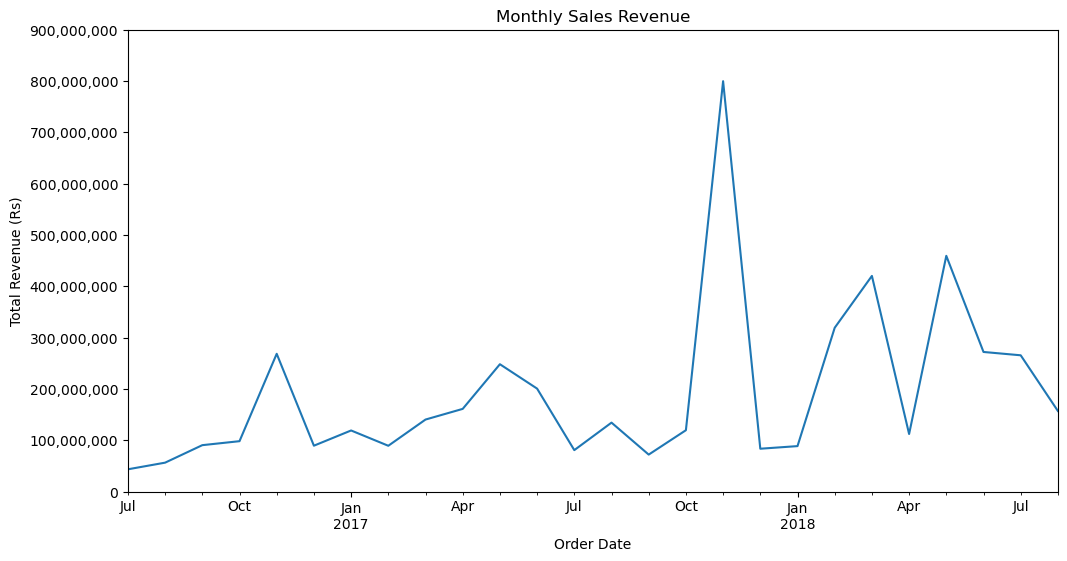

In [285]:
monthly_sales = ecommerce.groupby(ecommerce["created_at"].dt.to_period("M"))["grand_total"].sum()
monthly_sales.plot(kind='line', figsize=(12,6))

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # Disable scientific notation

# Format the currency on the y axis
current_values = plt.gca().get_yticks()
plt.gca().set_xticks(plt.gca().get_xticks())
plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Set labels
plt.title("Monthly Sales Revenue")
plt.xlabel("Order Date")
plt.ylabel("Total Revenue (Rs)")

plt.show()

#### Bar chart of the top 10 categories by revenue

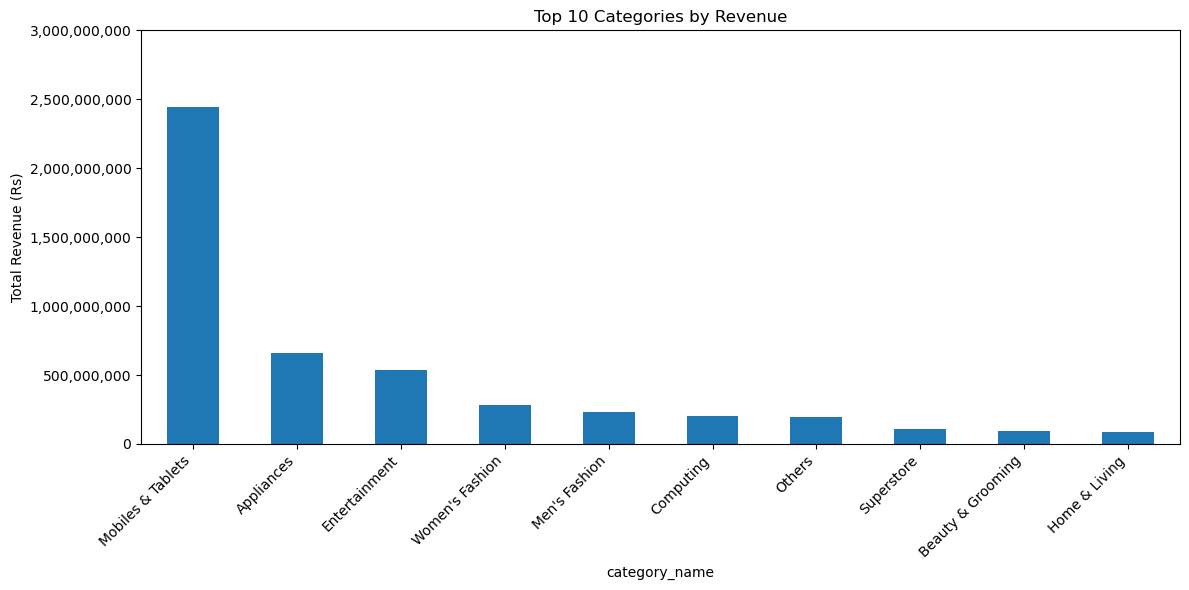

In [286]:
category_sales = ecommerce.groupby('category_name', observed=False)['grand_total'].sum().sort_values(ascending=False)
category_sales.head(10).plot(kind='bar', figsize=(12,6))

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # Disable scientific notation

# Format the currency on the y axis
current_values = plt.gca().get_yticks()
plt.gca().set_xticks(plt.gca().get_xticks())
plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('Top 10 Categories by Revenue')
plt.ylabel('Total Revenue (Rs)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Pie chart of the order status distribution

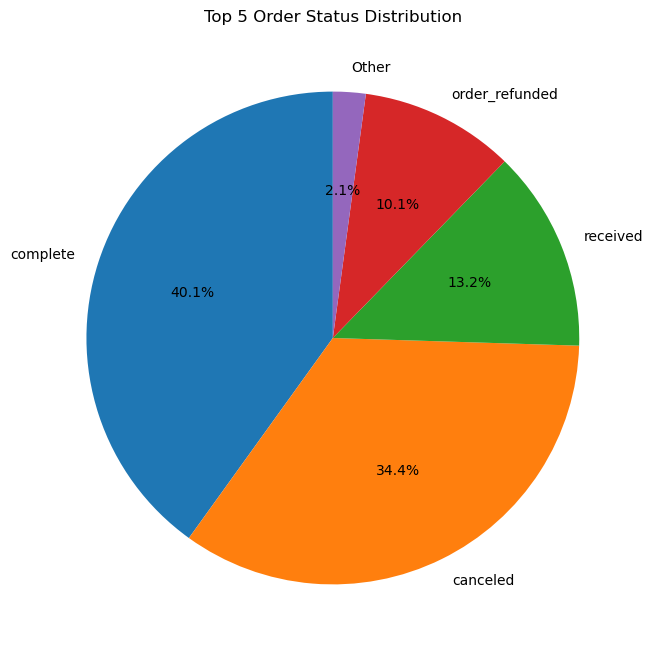

In [287]:
# Identify the top 4 order statuses since they make up 97.8% of the total order statuses
status_counts = ecommerce["status"].value_counts()
top_4_statuses = status_counts.head(4).index

# Add "Other" to the existing categories of the "status" column since we can't group categorical columns without this
ecommerce["status"] = ecommerce["status"].cat.add_categories(["Other"])

# Select all rows where the status is not in the top 5
ecommerce.loc[~ecommerce["status"].isin(top_4_statuses), "status"] = "Other"

# Remove the now-unused original categories
ecommerce["status"] = ecommerce["status"].cat.remove_unused_categories()

grouped_counts = ecommerce['status'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(grouped_counts, labels=grouped_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Order Status Distribution")
plt.ylabel("")
plt.show()

#### Bar chart of the payment method distribution

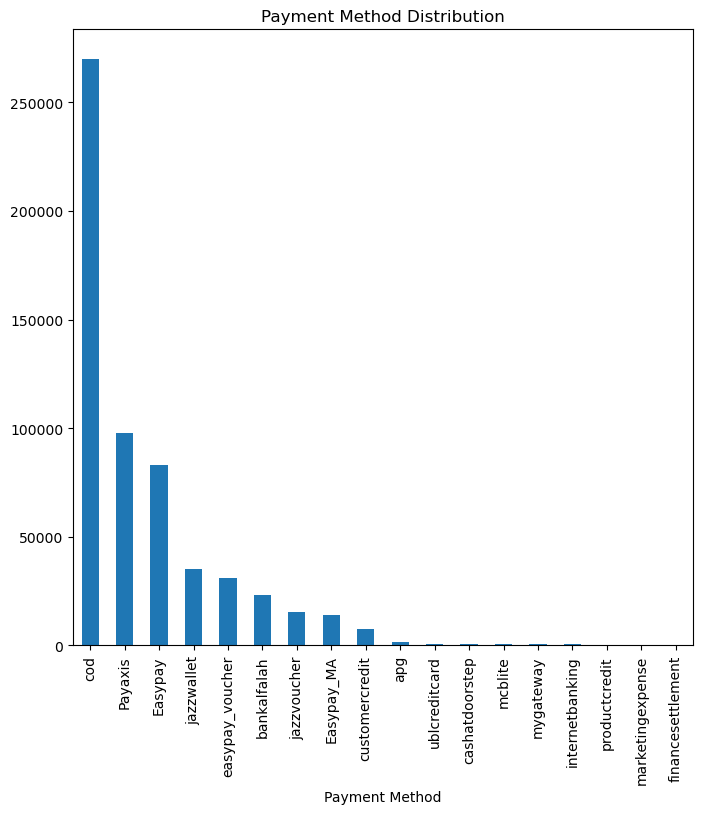

In [288]:
ecommerce['payment_method'].value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Payment Method Distribution')
plt.xlabel("Payment Method")
plt.ylabel('') # Hide the default ylabel
plt.show()

#### Average order value (AOV) of the discounted vs. non-discounted orders

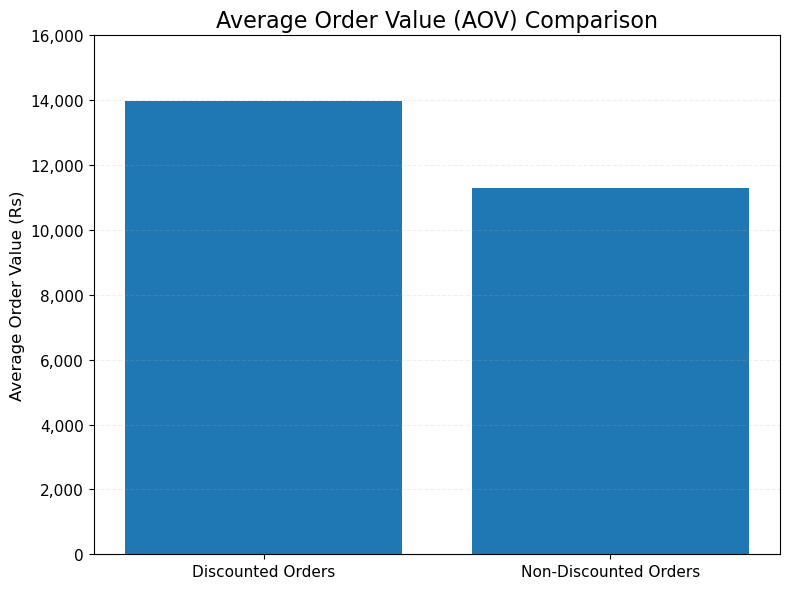

In [289]:
grouped_orders = ecommerce.groupby(by="increment_id").sum(numeric_only=True)

discounted_orders = grouped_orders[grouped_orders['discount_amount'] > 0]
non_discounted_orders = grouped_orders[grouped_orders['discount_amount'] == 0]

discounted_orders_aov = discounted_orders.mean()["grand_total"]
non_discounted_orders_aov = non_discounted_orders.mean()["grand_total"]

aov_data = {
    'Discounted Orders': discounted_orders_aov,
    'Non-Discounted Orders': non_discounted_orders_aov
}

aov_series = pd.Series(aov_data)

# Create the figure and axes
plt.figure(figsize=(8, 6))
bars = plt.bar(aov_series.index, aov_series.values)

# Format the currency on the y axis
current_values = plt.gca().get_yticks()
plt.gca().set_xticks(plt.gca().get_xticks())
plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Add titles and labels
plt.title('Average Order Value (AOV) Comparison', fontsize=16)
plt.ylabel('Average Order Value (Rs)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add a grid for easier value reading
plt.grid(axis='y', linestyle='--', alpha=0.2)

# Ensure the layout is clean
plt.tight_layout()

# Display the plot
plt.show()

#### Correlation between order total and discount amount

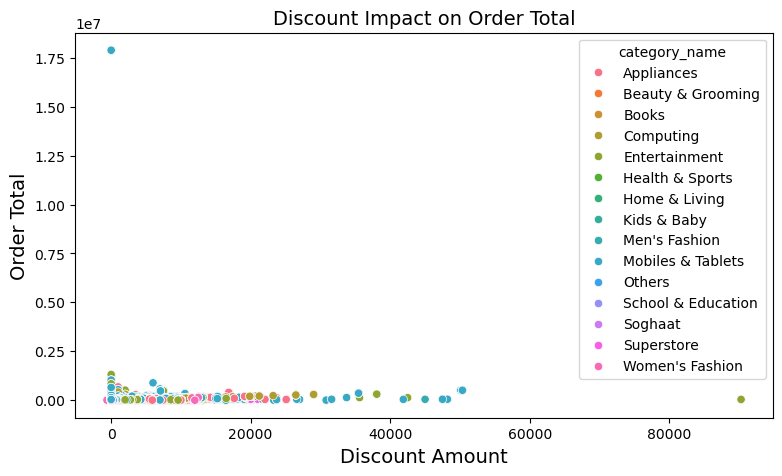

In [290]:
plt.figure(figsize=(9, 5))

sns.scatterplot(x='discount_amount', y='grand_total', data=ecommerce, hue='category_name')

# Add title and labels
plt.title('Discount Impact on Order Total', fontsize=14)
plt.xlabel('Discount Amount', fontsize=14)
plt.ylabel('Order Total', fontsize=14)

# Display plot
plt.show()

#### Correlation heatmap

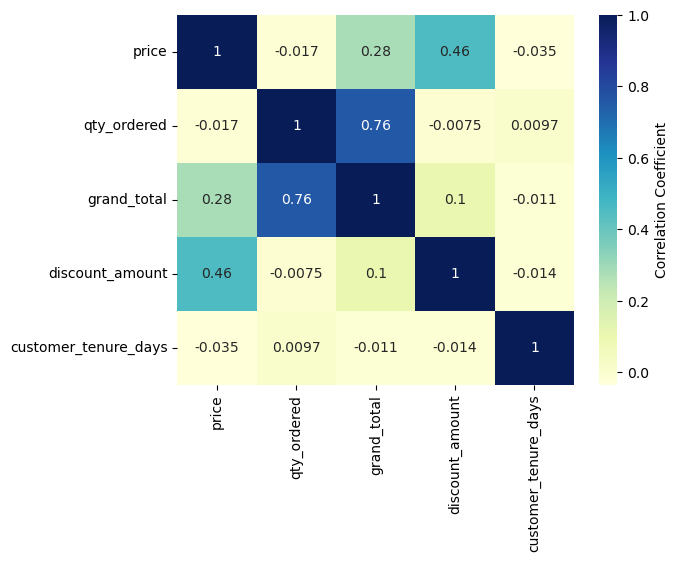

In [291]:
correlation_cols = ["price", "qty_ordered", "grand_total", "discount_amount", "customer_tenure_days"]

corr_mtx = ecommerce[correlation_cols].corr()

sns.heatmap(corr_mtx, cmap="YlGnBu", annot=True, cbar_kws={'label': 'Correlation Coefficient'})

plt.show()

#### Correlation heatmap to analyze which categories cancelled/refunded the most

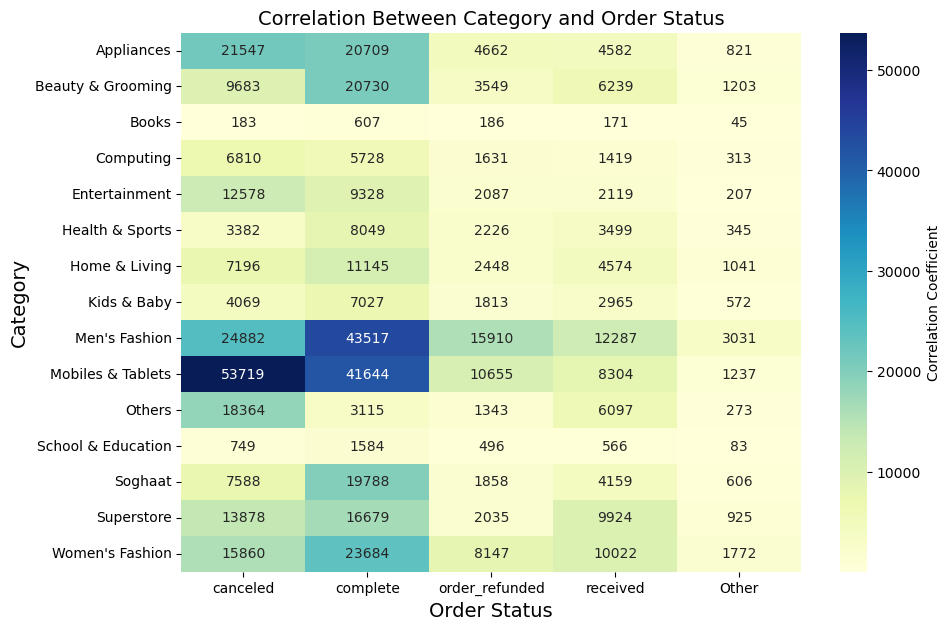

In [292]:
# Cross tabulation
category_vs_status = pd.crosstab(ecommerce['category_name'], ecommerce['status'])


plt.figure(figsize=(10, 7))


sns.heatmap(category_vs_status, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Correlation Coefficient'})

# Add title and labels
plt.title('Correlation Between Category and Order Status', fontsize=14)
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Category', fontsize=14)

plt.show()

#### Correlation heatmap to analyze which payment methods are cancelled/refunded the most

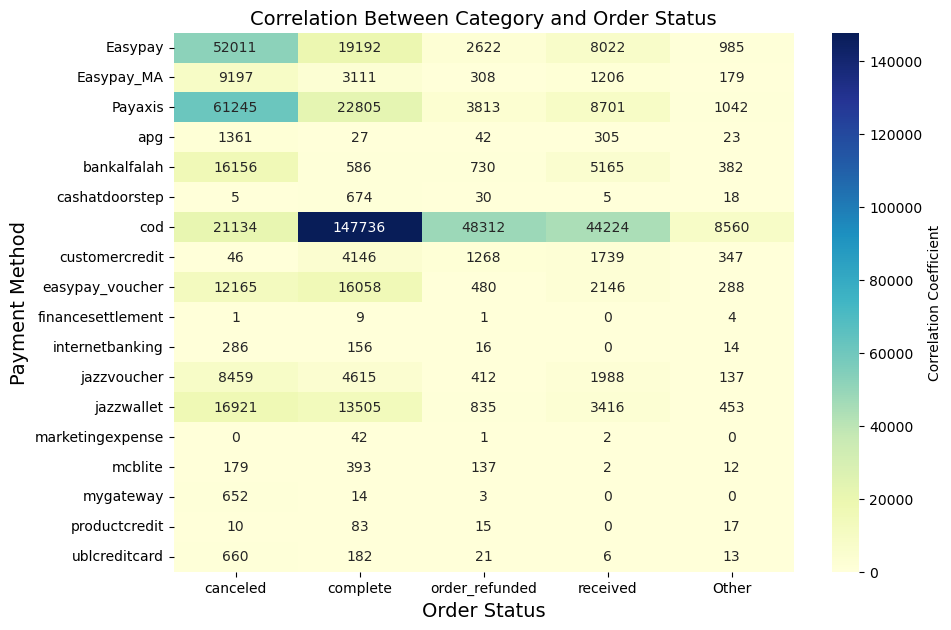

In [293]:
# Cross tabulation
payment_vs_status = pd.crosstab(ecommerce['payment_method'], ecommerce['status'])

plt.figure(figsize=(10, 7))

sns.heatmap(payment_vs_status, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Correlation Coefficient'})

# Add title and labels
plt.title('Correlation Between Category and Order Status', fontsize=14)
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Payment Method', fontsize=14)

plt.show()